## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

from collections import Counter

In [147]:
dfPass = pd.read_csv('/Users/wjdol/Desktop/LighthouseLabs/Flight_delays/data/Passengers_table_raw.csv')

In [148]:
dfPass.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   departures_scheduled   50000 non-null  int64 
 1   departures_performed   50000 non-null  int64 
 2   payload                50000 non-null  int64 
 3   seats                  50000 non-null  int64 
 4   passengers             50000 non-null  int64 
 5   freight                50000 non-null  int64 
 6   mail                   50000 non-null  int64 
 7   distance               50000 non-null  int64 
 8   ramp_to_ramp           50000 non-null  int64 
 9   air_time               50000 non-null  int64 
 10  unique_carrier         50000 non-null  object
 11  airline_id             50000 non-null  int64 
 12  unique_carrier_name    50000 non-null  object
 13  region                 50000 non-null  object
 14  carrier                50000 non-null  object
 15  carrier_name       

In [149]:
dfPass.select_dtypes(include=['object'])

,unique_carrier,unique_carrier_name,region,carrier,carrier_name,origin,origin_city_name,origin_country,origin_country_name,dest,dest_city_name,dest_country,dest_country_name,class,data_source
0,DL,Delta Air Lines Inc.,D,DL,Delta Air Lines Inc.,MSP,"Minneapolis, MN",US,United States,MCI,"Kansas City, MO",US,United States,F,DU
1,UA,United Air Lines Inc.,L,UA,United Air Lines Inc.,EWR,"Newark, NJ",US,United States,SDQ,"Santo Domingo, Dominican Republic",DO,Dominican Republic,F,IU
2,UA,United Air Lines Inc.,D,UA,United Air Lines Inc.,SEA,"Seattle, WA",US,United States,SFO,"San Francisco, CA",US,United States,F,DU
3,US,US Airways Inc.,D,US,US Airways Inc.,DCA,"Washington, DC",US,United States,BWI,"Baltimore, MD",US,United States,F,DU
4,OO,SkyWest Airlines Inc.,D,OO,SkyWest Airlines Inc.,MSP,"Minneapolis, MN",US,United States,MOT,"Minot, ND",US,United States,F,DU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,YV,Mesa Airlines Inc.,D,YV,Mesa Airlines Inc.,IAH,"Houston, TX",US,United States,CHS,"Charleston, SC",US,United States,F,DU
49996,GV,Grant Aviation,D,GV,Grant Aviation,KWK,"Kwigillingok, AK",US,United States,KKH,"Kongiganak, AK",US,United States,F,DU
49997,WN,Southwest Airlines Co.,D,WN,Southwest Airlines Co.,AMA,"Amarillo, TX",US,United States,DAL,"Dallas, TX",US,United States,F,DU
49998,WN,Southwest Airlines Co.,D,WN,Southwest Airlines Co.,TPA,"Tampa, FL",US,United States,ATL,"Atlanta, GA",US,United States,F,DU


In [150]:
carrier_comp = (dfPass['unique_carrier'] == dfPass['carrier'])

In [151]:
dfPass['unique_carrier'].nunique()

331

In [152]:
# create keys for similar column names

uniq_carrier_keys = dict((dfPass.loc[:, ['unique_carrier', 'unique_carrier_name']].value_counts()))

carrier_keys = dict((dfPass.loc[:, ['carrier_name', 'carrier']].value_counts()))

country_keys = dict((dfPass.loc[:, ['origin_country', 'origin_country_name']].value_counts()))

dest_country_keys = dict((dfPass.loc[:, ['dest_country', 'dest_country_name']].value_counts()))

origin_city_keys = dict((dfPass.loc[:, ['origin', 'origin_city_name']].value_counts()))

dest_city_keys = dict((dfPass.loc[:, ['dest', 'dest_city_name']].value_counts()))



In [153]:
dfPass = dfPass.drop(['unique_carrier_name', 'carrier_name', 'origin_city_name', 'origin_country_name', 'dest_city_name', 'dest_country_name', 'rand_sort', 'data_source'], axis=1)

In [163]:
dfPass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   departures_scheduled   50000 non-null  int64 
 1   departures_performed   50000 non-null  int64 
 2   payload                50000 non-null  int64 
 3   seats                  50000 non-null  int64 
 4   passengers             50000 non-null  int64 
 5   freight                50000 non-null  int64 
 6   mail                   50000 non-null  int64 
 7   distance               50000 non-null  int64 
 8   ramp_to_ramp           50000 non-null  int64 
 9   air_time               50000 non-null  int64 
 10  unique_carrier         50000 non-null  object
 11  airline_id             50000 non-null  int64 
 12  region                 50000 non-null  object
 13  carrier                50000 non-null  object
 14  carrier_group          50000 non-null  int64 
 15  carrier_group_new  

In [169]:
dfPass.groupby(['year','unique_carrier'])[['distance', 'passengers', 'freight','departures_performed']], agg=('mean'))

distance   passengers
year unique_carrier                          
2015 04Q              285.722222    97.555556
     09Q              779.827160   131.086420
     0BQ             4945.000000     6.000000
     0JQ              663.666667   613.000000
     0RQ             3816.000000     0.000000
...                          ...          ...
2019 YV               652.897436  2292.991453
     YX               630.439850   997.105263
     Z3                49.692308     8.230769
     ZW               437.403509  1190.719298
     ZX               541.857143  1976.142857

[1237 rows x 2 columns]

In [171]:
pd.pivot_table(dfPass, index=['year', 'unique_carrier'], values=['distance', 'passengers', 'freight', 'departures_performed'], aggfunc=np.mean)

departures_performed     distance     freight  \
year unique_carrier                                                  
2015 04Q                        17.611111   285.722222    0.000000   
     09Q                         2.012346   779.827160    0.000000   
     0BQ                         1.000000  4945.000000    0.000000   
     0JQ                         8.750000   663.666667    0.000000   
     0RQ                         1.000000  3816.000000    0.000000   
...                                   ...          ...         ...   
2019 YV                         39.598291   652.897436   54.358974   
     YX                         19.409774   630.439850    0.000000   
     Z3                          2.846154    49.692308  231.615385   
     ZW                         31.666667   437.403509    0.000000   
     ZX                         63.142857   541.857143    0.000000   

                      passengers  
year unique_carrier               
2015 04Q               97.555556  
     09Q              131.086420  
     0BQ                6.000000  
     0JQ              613.000000  
     0RQ                0.000000  
...                          ...  
2019 YV              2292.991453  
     YX               997.105263  
     Z3                 8.230769  
     ZW              1190.719298  
     ZX              1976.142857  

[1237 rows x 4 columns]

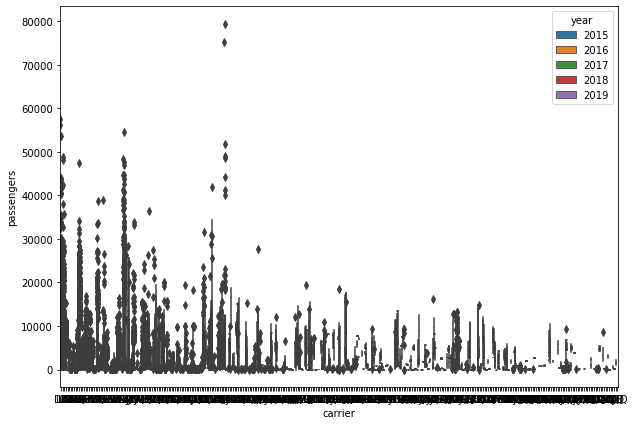

In [181]:
fig, ax = plt.subplots(figsize=(10,7))

sns.boxplot(data=dfPass, x='carrier', y='passengers', hue='year');

In [180]:
dfPass.sort_values(by=['departures_performed'], ascending=False).head(10)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_city_market_id,dest,dest_country,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class
4226,822,814,25423500,98382,75216,82020,0,100,32035,19536,...,32134,HNL,US,6,608,1,2015,1,1,F
38566,810,810,36450000,99630,79434,462196,0,100,34137,17781,...,33830,OGG,US,6,608,1,2018,1,1,F
39066,769,769,922800,4200,2876,4607,0,11,9884,7577,...,34955,SPN,US,0,79,1,2018,1,1,F
44,668,661,11765800,50236,38845,15019,0,129,32547,26706,...,30559,SEA,US,4,482,1,2015,1,1,F
47409,541,540,17066200,69120,51718,40425,0,102,19551,11434,...,32134,HNL,US,6,608,1,2019,1,1,F
35626,511,510,22950000,62730,48611,220583,0,102,21572,11468,...,32982,LIH,US,6,608,1,2018,1,1,F
29006,481,482,15243400,61696,48969,207948,0,163,22938,13841,...,32758,KOA,US,6,608,1,2017,1,1,F
45307,486,478,8503900,36328,26565,13380,1059,129,28475,16251,...,30559,SEA,US,4,482,1,2019,1,1,F
40223,480,466,8285900,35416,23768,13757,5320,129,23010,14369,...,34057,PDX,US,4,482,1,2019,1,1,F
1370,471,465,837000,4185,2204,0,0,96,22320,18135,...,34448,EIS,VG,1,125,1,2015,1,1,F


In [183]:
Passengers_table_processed = dfPass.copy()

Passengers_table_processed.to_csv("/Users/wjdol/Desktop/LighthouseLabs/Flight_delays/data/Passengers_table_processed.csv")

In [182]:
#pandas_profiling.ProfileReport(dfPass)

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?